In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(14,8)

In [2]:
read1=pd.read_csv('dataframe_.csv')
read1

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [3]:
read1.shape

(1697, 2)

In [11]:
read1.isnull().sum()

input     1
output    1
dtype: int64

In [15]:
read1.dropna(inplace=True)

In [102]:
read1.describe()

,input,output,Predicted_OUTPUT
count,1696.000000,1696.000000,1696.000000
mean,1.159933,-34.088017,-34.088017
std,79.005970,65.771112,33.660057
min,-134.962839,-132.422167,-92.082372
25%,-63.386506,-80.026767,-61.587671
50%,10.195194,-50.470981,-30.238594
75%,70.264109,-11.000000,-4.646565
max,134.605775,134.425495,22.765847


In [16]:
read1.isnull().sum()

input     0
output    0
dtype: int64

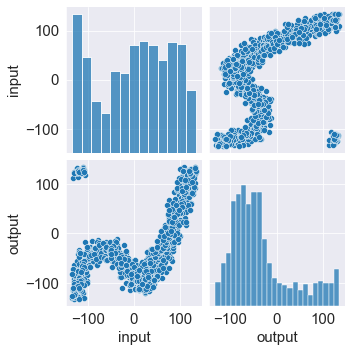

In [52]:
sns.pairplot(read1)
plt.show()

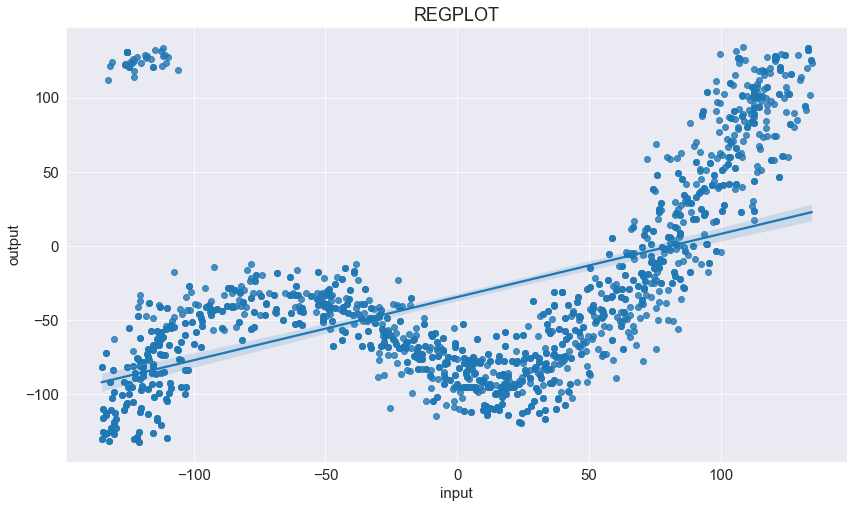

In [47]:
sns.regplot(x='input',y='output',data=read1)
plt.title('REGPLOT')
plt.show()

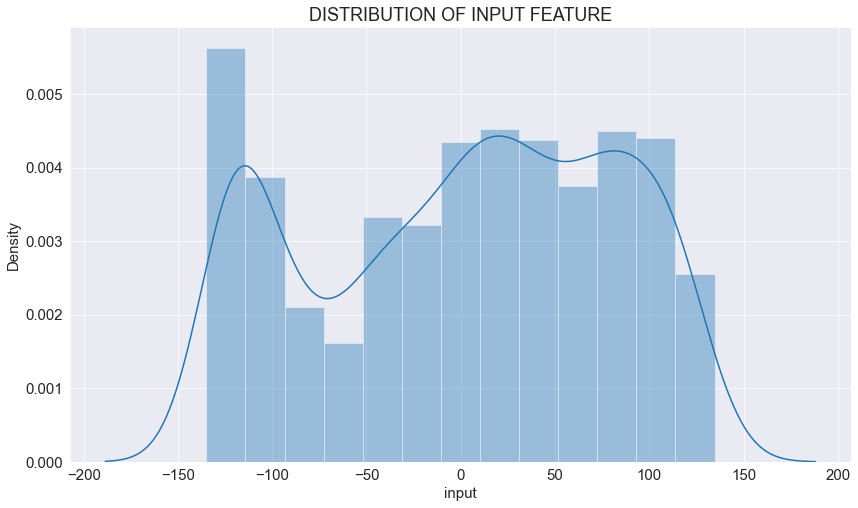

In [51]:
sns.distplot(read1['input'])
plt.title('DISTRIBUTION OF INPUT FEATURE')
plt.show()

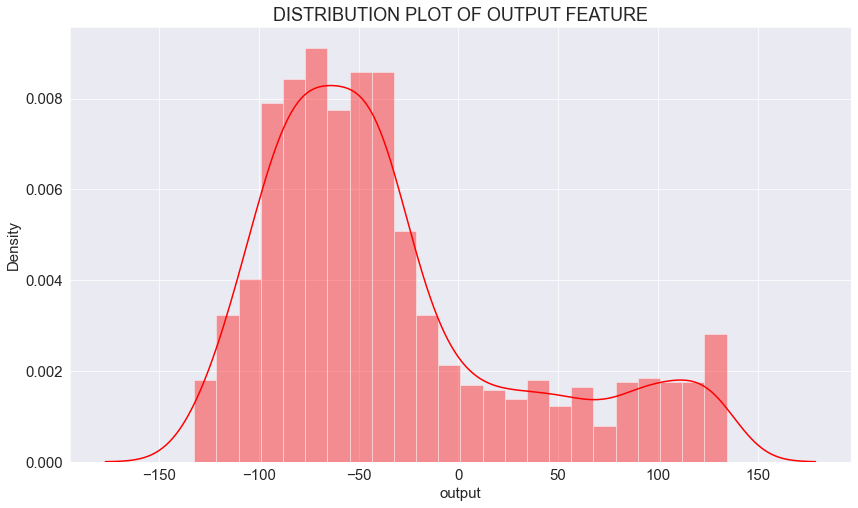

In [50]:
sns.distplot(read1['output'],color='red')
plt.title('DISTRIBUTION PLOT OF OUTPUT FEATURE')
plt.show()

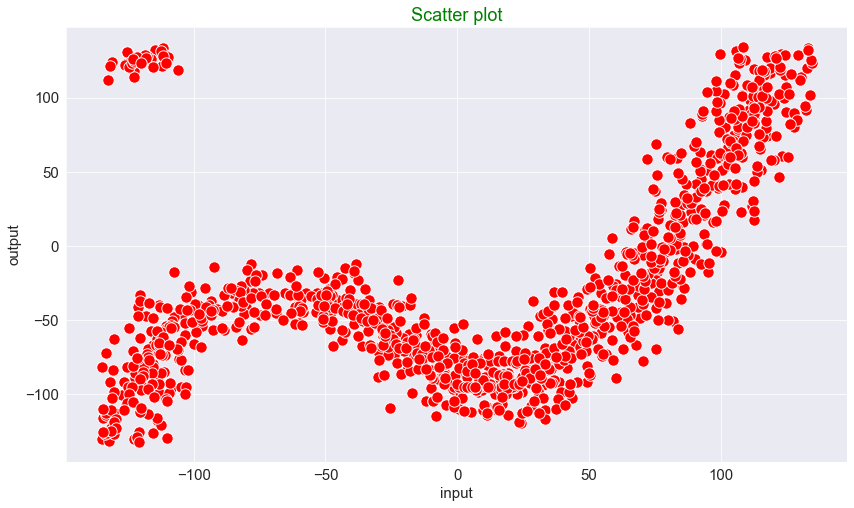

In [56]:
plt.title('Scatter plot',color='green')
sns.scatterplot(x=read1.input,y=read1.output,color='r', marker='o',s=130)
plt.show()

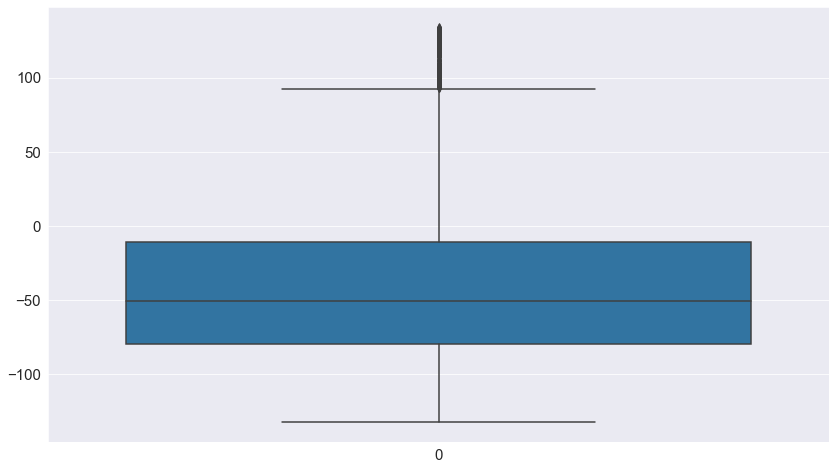

In [107]:
sns.boxplot(read1['output'])
plt.show()

In [109]:
#positions of the Outliers
print(np.where(read1['output']>100))

(array([ 339,  341,  343,  346,  347,  350,  351,  352,  354,  355,  356,
        357,  358,  359,  360,  361,  362,  363,  453,  457,  460,  461,
        464,  467,  468,  470,  472,  473,  474,  475,  476,  477,  478,
        479,  480,  481,  482,  483,  484,  485,  486,  487,  488,  489,
        490,  491,  492,  496,  498, 1038, 1046, 1048, 1050, 1052, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1064, 1065, 1066,
       1067, 1068, 1069, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078,
       1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089,
       1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100,
       1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1449,
       1451, 1453, 1456, 1457, 1460, 1461, 1462, 1464, 1465, 1466, 1467,
       1468, 1469, 1470, 1471, 1472, 1473], dtype=int64),)


In [120]:
from scipy import stats
z = np.abs(stats.zscore(read1['output']))
print(z)

0       1.467400
1       1.457770
2       1.460856
3       1.394228
4       1.196884
          ...   
1692    0.643221
1693    0.740801
1694    0.804724
1695    1.077615
1696    1.028701
Name: output, Length: 1696, dtype: float64


In [116]:
Q1 = np.percentile(read1['output'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(read1['output'], 75,
                   interpolation = 'midpoint')
iqr= Q3 - Q1
print(iqr)

69.02676665


In [118]:
# Above Upper bound
up= read1['output'] >= (Q3+1.5*iqr)
print("Upper bound:",up)
print(np.where(up))
# Below Lower bound
low = read1['output'] <= (Q1-1.5*iqr)
print("Lower bound:", low)
print(np.where(low))

Upper bound: 0       False
1       False
2       False
3       False
4       False
        ...  
1692    False
1693    False
1694    False
1695    False
1696    False
Name: output, Length: 1696, dtype: bool
(array([ 339,  341,  342,  343,  345,  346,  347,  350,  351,  352,  353,
        354,  355,  356,  357,  358,  359,  360,  361,  362,  363,  453,
        456,  457,  460,  461,  462,  464,  465,  466,  467,  468,  470,
        471,  472,  473,  474,  475,  476,  477,  478,  479,  480,  481,
        482,  483,  484,  485,  486,  487,  488,  489,  490,  491,  492,
        493,  496,  498, 1038, 1043, 1044, 1046, 1048, 1050, 1052, 1053,
       1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064,
       1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075,
       1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086,
       1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097,
       1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1

# LINEAR_REGRESSION MODEL

In [94]:
from sklearn.linear_model import LinearRegression


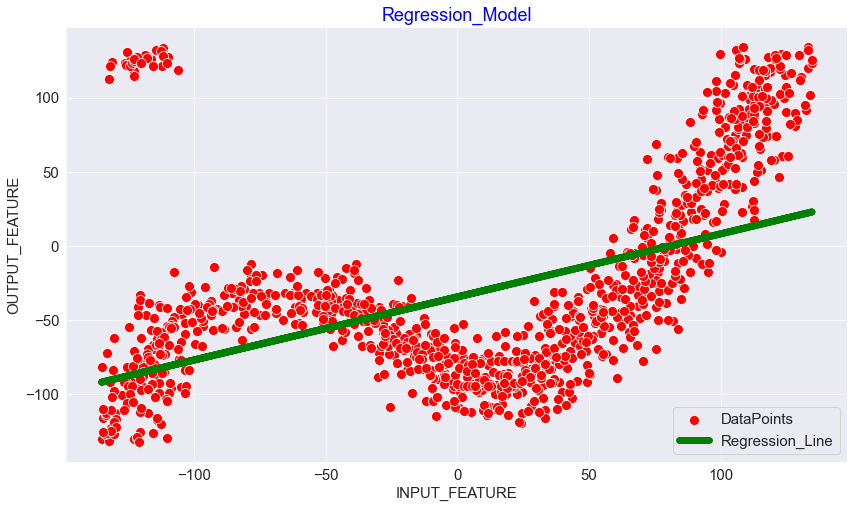

In [121]:
plt.title('Regression_Model',color='blue')
plt.xlabel('INPUT_FEATURE')
plt.ylabel('OUTPUT_FEATURE')
sns.scatterplot(x=read1['input'],y=read1.output,color='r',marker='o',s=100)
plt.plot(read1.input, reg.predict(read1[['input']]), color='green',linewidth=7)
plt.legend(['DataPoints','Regression_Line'])
plt.show()

In [122]:
prediction = reg.predict(read1[['input']])
prediction

array([-86.87518319, -86.35998977, -92.06285051, ..., -21.10499409,
       -22.18794527, -27.27754149])

In [97]:
read1['Predicted_OUTPUT'] = prediction
read1

,input,output,Predicted_OUTPUT
0,-122.740667,-130.572085,-86.875183
1,-121.531419,-129.938929,-86.359990
2,-134.917019,-130.141832,-92.062851
3,-120.605951,-125.760932,-85.965699
4,-129.894781,-112.785214,-89.923154
...,...,...,...
1692,25.410184,-76.380902,-23.756332
1693,29.537304,-82.796934,-21.997995
1694,31.633331,-87.000000,-21.104994
1695,29.091458,-104.943052,-22.187945


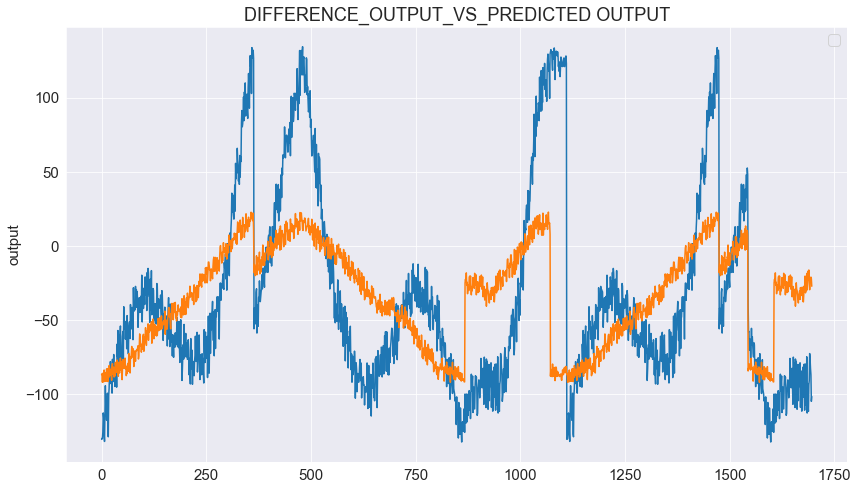

In [123]:
sns.lineplot(read1['output'])
sns.lineplot(read1['Predicted_OUTPUT'])
plt.title('DIFFERENCE_OUTPUT_VS_PREDICTED OUTPUT')
plt.legend('output','Predicted_OUTPUT')
plt.show()

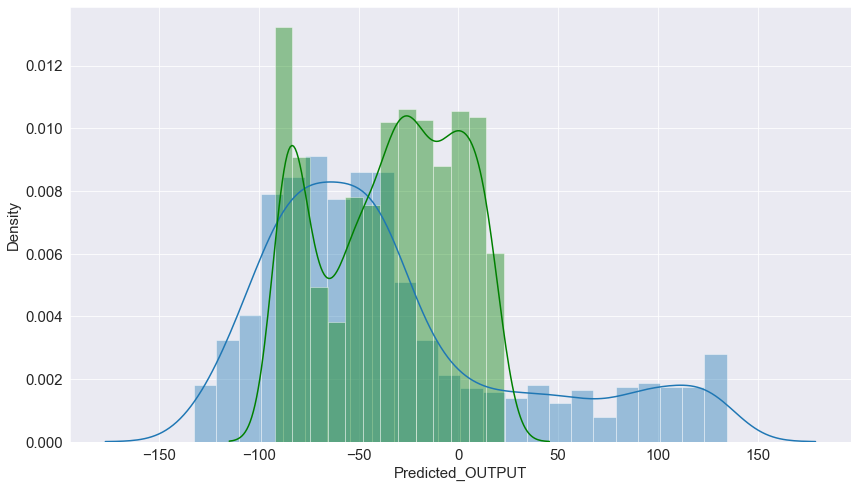

In [76]:
sns.distplot(read1['output'])
sns.distplot(read1['Predicted_OUTPUT'],color='g')
plt.show()

In [99]:
read1

,input,output,Predicted_OUTPUT
0,-122.740667,-130.572085,-86.875183
1,-121.531419,-129.938929,-86.359990
2,-134.917019,-130.141832,-92.062851
3,-120.605951,-125.760932,-85.965699
4,-129.894781,-112.785214,-89.923154
...,...,...,...
1692,25.410184,-76.380902,-23.756332
1693,29.537304,-82.796934,-21.997995
1694,31.633331,-87.000000,-21.104994
1695,29.091458,-104.943052,-22.187945
